In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from tqdm import tqdm

In [3]:
df1 = pd.read_csv('Blog Ratings.csv')
df2 = pd.read_csv('Medium Blog Data.csv')
df2.head()

,blog_id,author_id,blog_title,blog_content,blog_link,blog_img,topic,scrape_time
0,1,4,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",https://medium.com/@seedifyfund/lets-dominate-...,https://miro.medium.com/fit/c/140/140/1*nByLJr...,ai,2023-02-27 07:37:48
1,3,4,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",https://medium.com/@seedifyfund/lets-dominate-...,https://miro.medium.com/fit/c/140/140/1*nByLJr...,ai,2023-02-27 07:41:47
2,4,7,Using ChatGPT for User Research,Applying AI to 4 common user research activiti...,https://medium.com/ux-planet/using-chatgpt-for...,https://miro.medium.com/fit/c/140/140/1*TZSGnN...,ai,2023-02-27 07:41:47
3,5,8,The Automated Stable-Diffusion Checkpoint Merg...,Checkpoint merging is powerful. The power of c...,https://medium.com/@media_97267/the-automated-...,https://miro.medium.com/fit/c/140/140/1*x3N_Hj...,ai,2023-02-27 07:41:47
4,6,9,The Art of Lazy Creativity: My Experience Co-W...,I was feeling particularly lazy one day and co...,https://medium.com/@digitalshedmedia/the-art-o...,https://miro.medium.com/fit/c/140/140/0*m2DdeT...,ai,2023-02-27 07:41:47


In [31]:
#Merge the two dataframes above to create input dataframe for recommender systems
df = pd.merge(df1, df2, on='blog_id')

In [32]:
df.head()

,blog_id,userId,ratings,author_id,blog_title,blog_content,blog_link,blog_img,topic,scrape_time
0,9025,11,3.5,5960,How I became a Frontend Developer,A little bit of background about me: as a teen...,https://medium.com/@steven.dornan93/how-i-beca...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-04-04 08:53:52
1,9025,38,3.5,5960,How I became a Frontend Developer,A little bit of background about me: as a teen...,https://medium.com/@steven.dornan93/how-i-beca...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-04-04 08:53:52
2,9025,253,5.0,5960,How I became a Frontend Developer,A little bit of background about me: as a teen...,https://medium.com/@steven.dornan93/how-i-beca...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-04-04 08:53:52
3,9025,385,0.5,5960,How I became a Frontend Developer,A little bit of background about me: as a teen...,https://medium.com/@steven.dornan93/how-i-beca...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-04-04 08:53:52
4,9025,394,3.5,5960,How I became a Frontend Developer,A little bit of background about me: as a teen...,https://medium.com/@steven.dornan93/how-i-beca...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-04-04 08:53:52


In [36]:
df1 = df.copy()

In [37]:
#drop duplicates
df.drop_duplicates(subset ="blog_id", keep = 'first', inplace = True)

In [38]:
df.head()

,blog_id,userId,ratings,author_id,blog_title,blog_content,blog_link,blog_img,topic,scrape_time
0,9025,11,3.5,5960,How I became a Frontend Developer,A little bit of background about me: as a teen...,https://medium.com/@steven.dornan93/how-i-beca...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-04-04 08:53:52
38,9320,11,5.0,6155,Writing an Algorithm to Calculate Article Read...,You have probably noticed a read-time number u...,https://medium.com/@dpericich/writing-an-algor...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-04-04 08:53:52
78,9246,11,3.5,6114,Diving into HTML and the Tools of the Trade,It’s been an incredible first week as a Bytewi...,https://medium.com/@muhammadnaeemtahir/diving-...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-04-04 08:53:52
114,9431,11,5.0,2386,Learning Too Many Programming Languages at Once?,Learning too many programming languages at onc...,https://medium.com/@mohit-singh/learning-too-m...,https://miro.medium.com/v2/resize:fill:140:140...,web-development,2023-04-04 08:53:52
139,875,11,2.0,699,Cryptocurrency Regulations: A Tug of War Betwe...,"Once upon a time in the wild, wild world of cr...",https://medium.com/@Juan_In_The_Chain/cryptocu...,https://miro.medium.com/v2/resize:fill:140:140...,blockchain,2023-04-03 06:06:20


In [39]:
df.columns

Index(['blog_id', 'userId', 'ratings', 'author_id', 'blog_title',
       'blog_content', 'blog_link', 'blog_img', 'topic', 'scrape_time'],
      dtype='object')

<AxesSubplot: xlabel='count', ylabel='topic'>

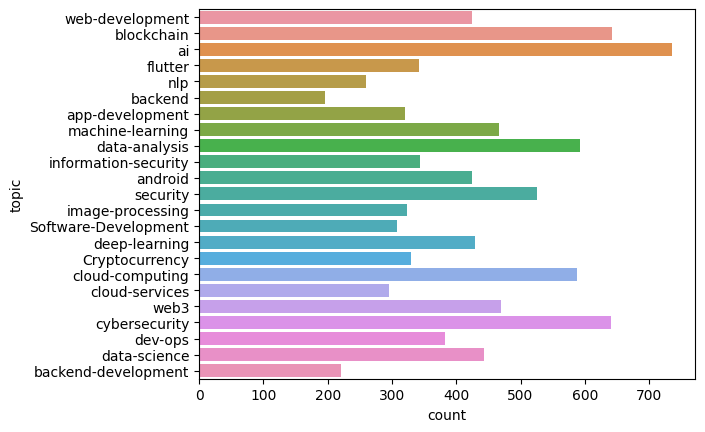

In [40]:
sns.countplot(y='topic',data=df)

In [41]:
topics = df['topic'].to_list()

In [42]:
tfid_vect = TfidfVectorizer(stop_words='english')
tfid_matrix = tfid_vect.fit_transform(topics)

In [43]:
cosine_sim = linear_kernel(tfid_matrix, tfid_matrix)

In [56]:
#get recommendations based on genre
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = df[df['topic'] == title].index[0]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 5 most similar movies
    sim_scores = sim_scores[:1]

    # Get the movie indices
    blog_indices = [i[0] for i in sim_scores]

    # Return the top 5 most similar movies
    return df.iloc[blog_indices]

In [ ]:
user_input = input("Enter a topic: ")
print('Generating recommendations for you based on the topic: ', user_input)
get_recommendations(user_input)

In [41]:
#Try with CLIP model
from transformers import BertTokenizer, BertModel
import torch

In [52]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [53]:
model = BertModel.from_pretrained('bert-base-uncased').to(device)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [63]:
def embed_text(texts, batch_size=32):
    embeddings = []
    # Create a progress bar
    progress_bar = tqdm(range(0, len(texts), batch_size), desc="Processing text batches")
    
    for start_index in progress_bar:
        # Select batch of text
        end_index = start_index + batch_size
        batch_texts = texts[start_index:end_index]

        # Tokenize and encode the batch
        inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
        
        # Move input tensors to the same device as the model
        inputs = {name: tensor.to(device) for name, tensor in inputs.items()}
        
        # Get the embeddings
        with torch.no_grad():
            outputs = model(**inputs)
        # Use the average of the last hidden state as the embedding
        batch_embeddings = outputs['last_hidden_state'].mean(dim=1).cpu()  # move to CPU here
        embeddings.append(batch_embeddings)
        
    # Concatenate all the embeddings
    embeddings = torch.cat(embeddings, dim=0)
    
    return embeddings  # Now embeddings is on CPU

In [64]:
df['blog_content'] = df['blog_content'].astype(str)

In [66]:
content = df['blog_content'].to_list()

In [67]:
embeddings = embed_text(content, batch_size=32)

Processing text batches: 100%|██████████| 304/304 [00:28<00:00, 10.76it/s]


In [69]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

In [77]:
nbrs = NearestNeighbors(n_neighbors=5, metric='cosine').fit(embeddings)

In [101]:
def get_recommendations_by_query(query, nbrs_model, tokenizer, bert_model, n_recommendations=5):
    # Embed the input query
    query_embedding = embed_text([query],batch_size=1)
    
    
    # Get nearest neighbors
    distances, indices = nbrs_model.kneighbors(query_embedding)
    
    # Remove the first element if it's the query itself
    recommended_indices = indices[0]
    
    #n recommendations
    recommended_indices = recommended_indices[:n_recommendations]

    # Get the titles of the recommended blogs
    title = df.iloc[recommended_indices]['blog_title']
    topic = df.iloc[recommended_indices]['topic']
    rating = df.iloc[recommended_indices]['ratings']

    #create a dataframe
    df1 = pd.DataFrame({'title':title, 'topic':topic,'ratings':rating},index=None)
    df1 = df1.sort_values(by='ratings', ascending=False)

    # Return the top_n most similar blogs
    return df1.head(n_recommendations)

In [103]:
user_query = input("Enter a query: ")
print('Generating recommendations for you based on the query: ', user_query)
get_recommendations_by_query(user_query, nbrs, tokenizer, model, n_recommendations=10)

Generating recommendations for you based on the query:  cryptocurrency and blockchain


Processing text batches: 100%|██████████| 1/1 [00:00<00:00, 32.26it/s]


,title,topic,ratings
109890,Top 6 Crypto Exchange/trading platforms in Ind...,blockchain,5.0
193438,How to increase the Probability that your Cryp...,blockchain,5.0
189653,How Can Features of Blockchain Support Sustain...,blockchain,5.0
114281,“Exploring the Potential of Programmable NFTs ...,Cryptocurrency,5.0
170219,Introducing MarketDex: Revolutionizing the Way...,blockchain,2.0
